In [1]:
#import the numpy, pandas, seaborn and matplot libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data sets to be used
test = pd.read_csv('cs-test.csv')
train = pd.read_csv('cs-training.csv')
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [4]:
#We would want to drop loan ID first.
train1 = train.drop(['Unnamed: 0'], axis=1)
train1.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 1. EXPLORATORY DATA ANALYSIS

Some desciptive statisitcs

In [5]:
train1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Visualizations

First strip plots to compare "SeriousDlqin2yrs" and the numerical variables

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


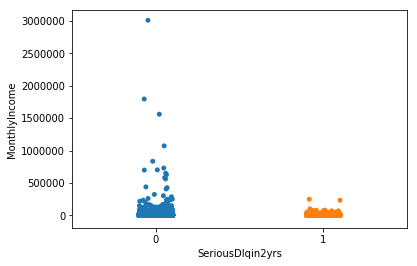

In [7]:
sns.stripplot(x="SeriousDlqin2yrs", y="MonthlyIncome", data=train1);

Here we see that most of our applicants have incomes of 500000 and below. There also are a few outliers amongst those that did not default.
Interestingly, everyone who defaulted has an income below 500k showing that low income earners are more likely to default than higher income earners

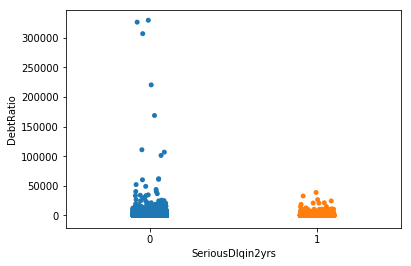

In [8]:
sns.stripplot(x="SeriousDlqin2yrs", y="DebtRatio", data=train1); 

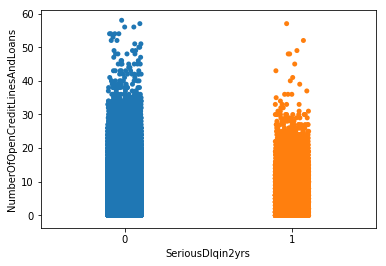

In [9]:
sns.stripplot(x="SeriousDlqin2yrs", y="NumberOfOpenCreditLinesAndLoans", data=train1);

On the average, people who default have fewer open credit Lines than people who do not.

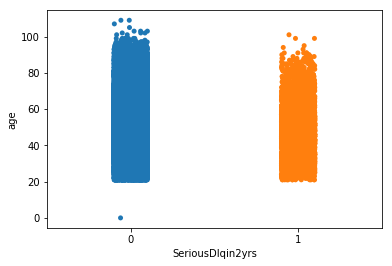

In [10]:
sns.stripplot(x="SeriousDlqin2yrs", y="age", data=train1);

We see that age does not show a significant correlation with the target variable

## 2. DATA CLEANING


Handling missing values

In [11]:
train1.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

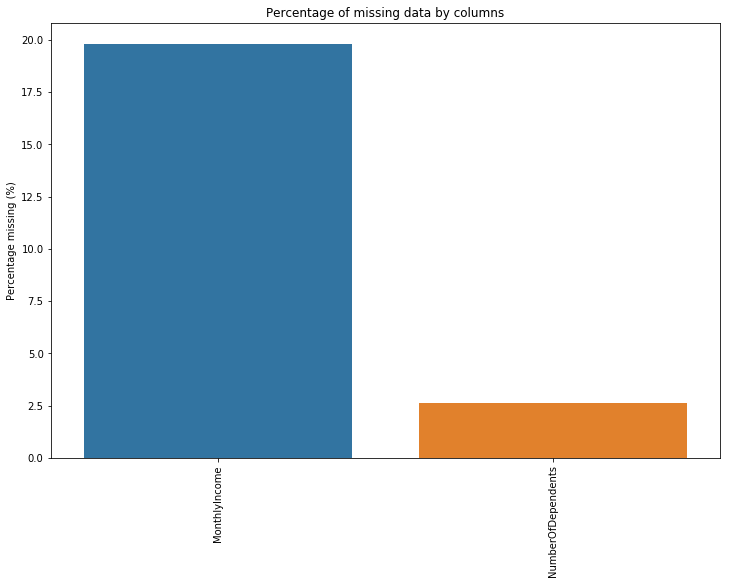

In [12]:
# Let's find percentage of each column missing

# get percentage of missing values
missing_percentage = (train1.isnull().sum() / len(train1)) * 100

# drop columns without missing values and sort
missing_percentage = missing_percentage.drop(missing_percentage[missing_percentage == 0].index).sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=missing_percentage.index, y=missing_percentage)
ax.set(title='Percentage of missing data by columns', ylabel='Percentage missing (%)')
plt.show()

There are only two columns with missing values. Monthly Income has the highest amount of missing variables at almost 20%, followed by Number of Depenedent at about 2.5% 


In [13]:
train1['MonthlyIncome'].isnull().sum()

29731

In [14]:
train1['MonthlyIncome'].median()

5400.0

In [15]:
#Let us inpute with the median

#Replace and confirm
dataset = [train1, test]
for data in dataset:
    data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(),inplace=True)
train1['MonthlyIncome'].isnull().sum()

0

In [16]:
# Drop missing values
train1 = train1.dropna(subset= ['NumberOfDependents'])

In [17]:
train1['NumberOfDependents'].isnull().sum()

0

In [18]:
train1.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Text(0.5, 1.0, 'Correlation Mtrix')

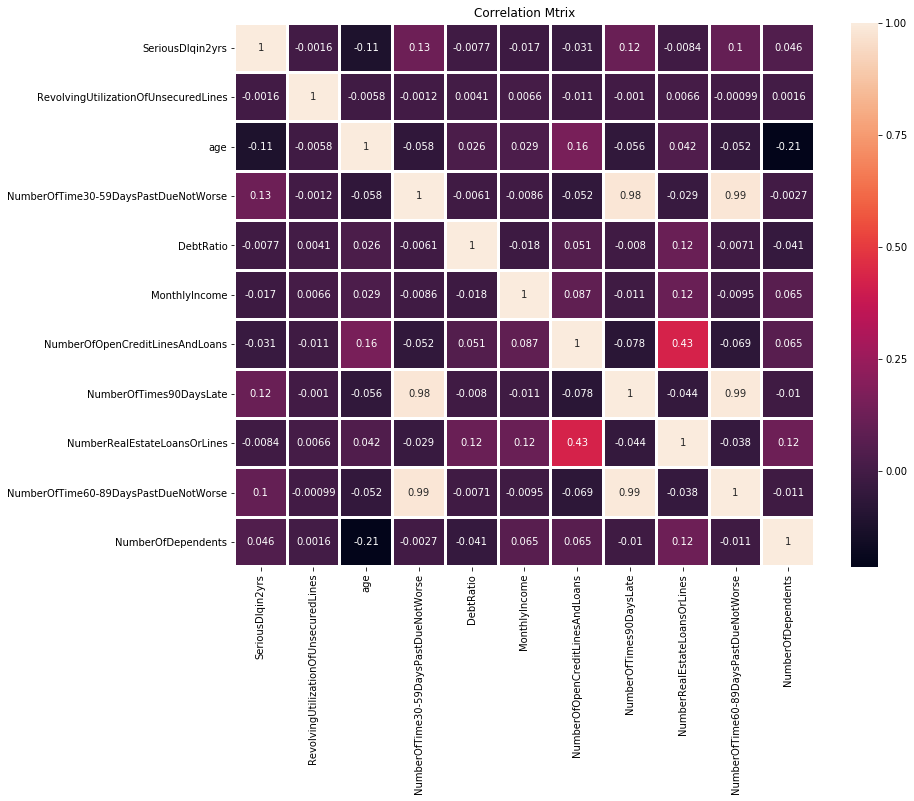

In [19]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train1.corr(),linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Mtrix')

From the correlation matrix above we can deduce the following

1. The Variables about time default -NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse are highly correlated with each other.
2. The number of open credit line is correlated with the number of real estate loans probably because more people take loans for Mortgage and real estate than others

### Univariate visualization & Outlier detection

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


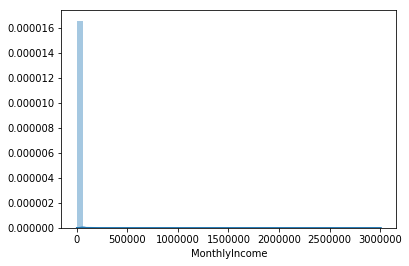

In [20]:
sns_plot = sns.distplot(train1['MonthlyIncome'],kde = True)
plt.show()

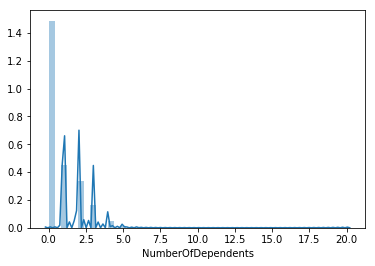

In [21]:
sns_plot = sns.distplot(train1['NumberOfDependents'])
plt.show()

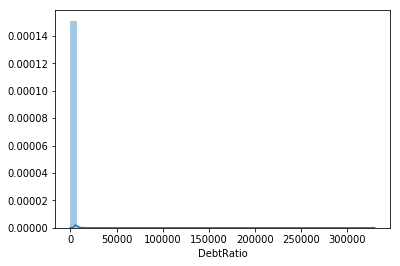

In [22]:
sns_plot = sns.distplot(train1['DebtRatio'])
plt.show()

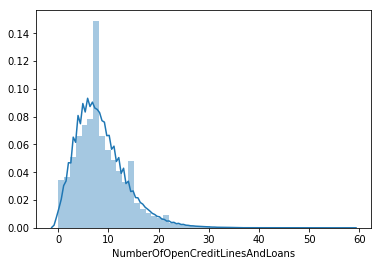

In [23]:
sns_plot = sns.distplot(train1['NumberOfOpenCreditLinesAndLoans'])
plt.show()

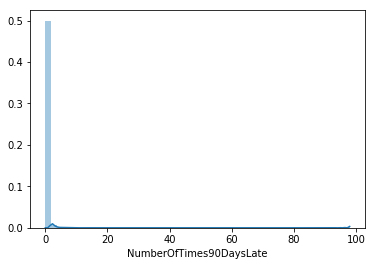

In [24]:
sns_plot = sns.distplot(train1['NumberOfTimes90DaysLate'])
plt.show()

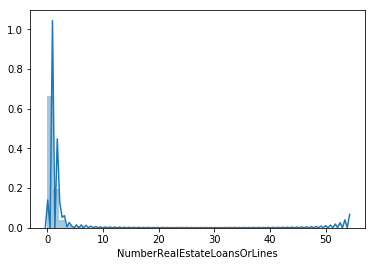

In [25]:
sns_plot = sns.distplot(train1['NumberRealEstateLoansOrLines'])
plt.show()

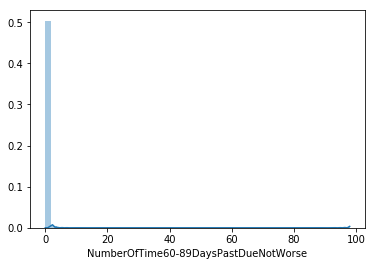

In [26]:
sns_plot = sns.distplot(train1['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()

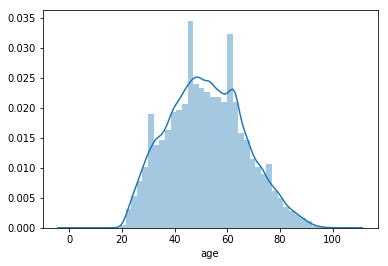

In [27]:
sns_plot = sns.distplot(train1['age'])
plt.show()

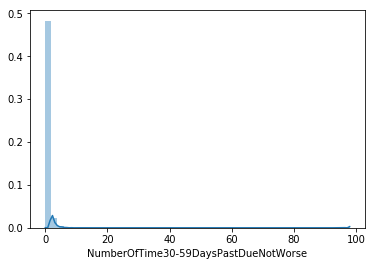

In [28]:
sns_plot = sns.distplot(train1['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

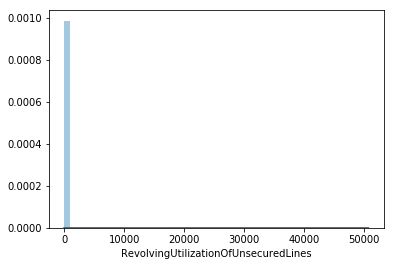

In [29]:
sns_plot = sns.distplot(train1['RevolvingUtilizationOfUnsecuredLines'],kde = True)
plt.show()

We see that there are outliers in all our numerical variables asides Age.

We will proceed to log transform these features.

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
Scaler = MinMaxScaler()
train_preprocessed = Scaler.fit_transform(train1)

In [32]:
#converting to dataframe
train_preprocessed = pd.DataFrame(train_preprocessed, columns = train1.columns)

In [33]:
#confirming minimum and maximum values for each column are 0 and 1 respectively
train_preprocessed.min()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [34]:
train_preprocessed.max()

SeriousDlqin2yrs                        1.0
RevolvingUtilizationOfUnsecuredLines    1.0
age                                     1.0
NumberOfTime30-59DaysPastDueNotWorse    1.0
DebtRatio                               1.0
MonthlyIncome                           1.0
NumberOfOpenCreditLinesAndLoans         1.0
NumberOfTimes90DaysLate                 1.0
NumberRealEstateLoansOrLines            1.0
NumberOfTime60-89DaysPastDueNotWorse    1.0
NumberOfDependents                      1.0
dtype: float64

## MODELLING

Before modelling, we first examine the percentage of positively delinquent people in the entire dataset. We do this to chekck for imbalance, which is often a problem in credit dataset.

In [35]:
#View counts of the two classes of the target variable
train_preprocessed['SeriousDlqin2yrs'].value_counts()

0.0    136229
1.0      9847
Name: SeriousDlqin2yrs, dtype: int64

In [36]:
#calculate ratio of positively delinquent people in the entire dataset via the formula - positive/(positive + negative)
negative = train_preprocessed['SeriousDlqin2yrs'].value_counts()[0]
positive = train_preprocessed['SeriousDlqin2yrs'].value_counts()[1]
ratio_of_positive_delinquent = positive/(positive+negative)

In [37]:
#print out the percentage of positive delinquent people in the dataset
print(f'The percentage of the positive delinquent people to the entire data is {ratio_of_positive_delinquent*100}%')

The percentage of the positive delinquent people to the entire data is 6.74101152824557%


As we can see, the positively delinquent people in the entire dataset is at 6.7%. This means the dataset is skewed towards the negatively delinquent people. Hence, we need to handle this imbalance. 

We shall do this by using the SMOTE ( Synthetic Minority Over-Sampling Technique algorithm ) from the imblearn library, which will be used to oversample the minority class to balance out the dataset. 

In [38]:
#import smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [39]:
#Specify train and target variables
X = train_preprocessed.drop(['SeriousDlqin2yrs'], axis = 1)
y = train_preprocessed.SeriousDlqin2yrs

In [40]:
#perform stratified train test split which ensures that equal members of each class are in both train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2)

Next, we apply the smote oversampling algorithm on the data

In [41]:
smote_x, smote_y = smote.fit_resample(X_train, y_train)

Confirm that both classes have equal instances in the dataset

In [42]:
from collections import Counter
Counter(smote_y)

Counter({1.0: 108982, 0.0: 108982})

As we can see, the classes have been balanced out via oversampling to 108 982 samples each.

Now, we proceed to applying algorithms on the dataset. We shall try out three algorithms:
- Logistic Regression
- Random Forest Classifier
- Gradient Boosting Classifier

For each algorithm, we shall train with the smote data and test on the originally unbalanced test data.

Since, accuracy will be a bad measure given the imbalance in the data, we shall also use the following metrics - precision, recall and f1 score. These will give us a truer representation of our model's performance.

We shall train and compare two models:
    - one on the imbalanced train data which shall be tested on the imbalanced test data
    - the second on the smote balanced train data which shall be tested on the imbalanced test data

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [44]:
def train(model):
    '''
    input - model 
    We shall train and compare two models:
    - one on the imbalanced train data and test on the imbalanced test data
    - the second on the smote balanced train data and test on the imbalanced test data
    '''
    
    #model trained on imbalanced train data
    model_imbalance = model.fit(X_train, y_train)
    imb_predictions = model_imbalance.predict(X_test)
    
    #model trained on smote balanced data
    model_balanced = model.fit(smote_x,smote_y)
    predictions = model_balanced.predict(X_test)

    #Print accuracy
    print('Non-SMOTE Accuracy score on test data: {}'.format(accuracy_score(y_test, imb_predictions)))
    print('Non-SMOTE Precision score on test data: {}'.format(precision_score(y_test, imb_predictions)))
    print('Non-SMOTE Recall score on test data: {}'.format(recall_score(y_test, imb_predictions)))
    print('Non-SMOTE F1 score on test data: {}'.format(f1_score(y_test, imb_predictions)))

    
    #Print accuracy
    print('SMOTE Accuracy score on test data: {}'.format(accuracy_score(y_test, predictions)))
    print('SMOTE Precision score on test data: {}'.format(precision_score(y_test, predictions)))
    print('SMOTE Recall score on test data: {}'.format(recall_score(y_test, predictions)))
    print('SMOTE F1 score on test data: {}'.format(f1_score(y_test, predictions)))


1. Logistic Regression

In [45]:
LR = LogisticRegression()
train(LR)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Non-SMOTE Accuracy score on test data: 0.9328107886089814
Non-SMOTE Precision score on test data: 0.5652173913043478
Non-SMOTE Recall score on test data: 0.013204672422549517
Non-SMOTE F1 score on test data: 0.025806451612903222
SMOTE Accuracy score on test data: 0.7383967688937568
SMOTE Precision score on test data: 0.15893243568165424
SMOTE Recall score on test data: 0.6714068054850177
SMOTE F1 score on test data: 0.2570234276271022


2. Random Forest

In [46]:
RF = RandomForestClassifier()
train(RF)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Non-SMOTE Accuracy score on test data: 0.9323658269441402
Non-SMOTE Precision score on test data: 0.4948453608247423
Non-SMOTE Recall score on test data: 0.1706449974606399
Non-SMOTE F1 score on test data: 0.2537764350453172
SMOTE Accuracy score on test data: 0.9190512048192772
SMOTE Precision score on test data: 0.3651226158038147
SMOTE Recall score on test data: 0.2722194007110208
SMOTE F1 score on test data: 0.3118999127145766


3. Gradient Boosting

In [47]:
GB = GradientBoostingClassifier()
train(GB)

Non-SMOTE Accuracy score on test data: 0.9365416210295728
Non-SMOTE Precision score on test data: 0.5963149078726968
Non-SMOTE Recall score on test data: 0.180802437785678
Non-SMOTE F1 score on test data: 0.27747466874512855
SMOTE Accuracy score on test data: 0.9090224534501643
SMOTE Precision score on test data: 0.3625847626645393
SMOTE Recall score on test data: 0.4616556627729812
SMOTE F1 score on test data: 0.40616621983914214


### Observation from Modelling

As we can see, all models perform well on accuracy which is a poor metric. 

However, the F1 score, which combines both precision and recall - as it is the harmonic mean of both these variables - tells the true story. The F1 score tells us how well a model performed on both classes of the data, which is what we are interested in. 

A model which just predicts all instances as negative, shall have an accuracy of 93% and this is very misleading. Hence, the F1 score shall be our focus metric. 

We can thus conclude that the Gradient Boosting trained on the SMOTE balanced data is our baseline model of choice. 

In [48]:
selected_model = GradientBoostingClassifier()
smote_x, smote_y = smote.fit_resample(X, y)
selected_model.fit(smote_x,smote_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Preparing test data**

In [49]:
test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [50]:
# Drop missing values
test = test.drop(['SeriousDlqin2yrs'], axis = 1)

In [51]:
#Let us inpute with the median

#Replace and confirm
dataset = [test]
for data in dataset:
    data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(),inplace=True)
test['MonthlyIncome'].isnull().sum()

0

In [52]:
#Let us inpute with the median

#Replace and confirm
dataset = [test]
for data in dataset:
    data['NumberOfDependents'].fillna(data['NumberOfDependents'].median(),inplace=True)
test['NumberOfDependents'].isnull().sum()

0

In [53]:
Scaler = MinMaxScaler()
test_preprocessed = Scaler.fit_transform(test.drop(['Unnamed: 0'], axis = 1))

Submission

In [54]:
predictions = selected_model.predict_proba(test_preprocessed)

In [101]:
submission = pd.DataFrame(predictions[:,1], columns = ['Probability'])
submission['id'] = test['Unnamed: 0']
submission.to_csv('submission.csv', index = False)